In [ ]:
import sys
sys.path.insert(0, '../..')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tests.test3 import Test
from visualizer.main import Visualizer
np.set_printoptions(legacy='1.25')

# Triangulacja wielokątów monotonicznych - problem monitorowania galerii


## Przydatne funkcje


In [ ]:
polygon_example_1 = [(5,5), (3,4), (6,3), (4,2), (6,0), (7,1), (8,4)]
polygon_example_2 = [(2,0), (5,1), (6,0), (8,3), (7,2), (8,7), (6,9), (5,8), (2,9), (1,7), (2,4), (4,5), (3,6), (5, 7), (5.5, 3), (2,2), (1,3), (0,1)]
polygon_example_colors = [1, 3, 1, 0, 2, 4, 0, 2, 0, 4, 1, 4, 4, 3, 4, 2, 0, 4]
polygon_example_tri = [(polygon_example_1[0], polygon_example_1[2]),
                      (polygon_example_1[2], polygon_example_1[5]),
                      (polygon_example_1[2], polygon_example_1[6]),
                      (polygon_example_1[2], polygon_example_1[4])]

In [ ]:
def draw_polygon(polygon):
    vis = Visualizer()
    points = polygon
    vis.add_polygon(polygon, fill=False)
    vis.show()

In [ ]:
def draw_polygon_colors(polygon,colors):
    points_start=[]
    points_end=[]
    points_connect=[]
    points_divide=[]
    points_regular=[]
    for i in range(len(polygon)):
        if colors[i]==0:
            points_start.append(polygon[i])
        elif colors[i]==1:
            points_end.append(polygon[i])
        elif colors[i]==2:
            points_connect.append(polygon[i])
        elif colors[i]==3:
            points_divide.append(polygon[i])
        elif colors[i]==4:
            points_regular.append(polygon[i])

    vis = Visualizer()
    colors_start = ['green']
    color_end=['red']
    color_connect=['blue']
    color_divide=['cyan']
    color_regular=['#3B240B']
    vis.add_polygon(polygon, fill=False)
    vis.add_point(points_start, color=colors_start)
    vis.add_point(points_end, color=color_end)
    vis.add_point(points_connect, color=color_connect)
    vis.add_point(points_divide, color=color_divide)
    vis.add_point(points_regular, color=color_regular)
    vis.show()

In [ ]:
def draw_polygon_tri(polygon,tri):

    vis = Visualizer()
    points = polygon
    tri_line_segments = tri
    vis.add_polygon(points, fill=False)
    vis.add_point(points)
    vis.add_line_segment(tri_line_segments, color='red')
    vis.show()

## Wprowadzenie
Celem ćwiczenia jest:
- sprawdzanie $y$-monotoniczności
- podział wierchołków na kategorie
- triangulacja wielokąta monotonicznego

### Przykładowy wielokąt $y$-monotoniczny

In [ ]:
draw_polygon(polygon_example_1)

Do tego celu wygeneruj wielokąt.

# Zadawanie wielokąta przy użyciu myszki

Aby stworzyć własny wielokąt, zaznacz jego kolejne wierzchołki dwukrotnym kliknięciem lewego przycisku myszy. Punkty należy wprowadzać w kierunku przeciwnym do ruchu wskazówek zegara. Po wprowadzeniu co najmniej trzech wierzchołków, zakończ rysowanie poprzez dwukrotne kliknięcie prawym przyciskiem myszy.

Uwaga: zamknięcie okna przed wprowadzeniem minimum trzech wierzchołków spowoduje zablokowanie funkcji tworzenia wielokąta.

In [134]:
%matplotlib tk

polygon = []

events = []
active = True
tmp_line = None

def draw_point(point):
    """
    Umieszcza punkt o danych współrzędnych na płaszczyźnie.
    :param point: krotka (x, y) określająca położenie punktu
    """
    plt.scatter(point[0], point[1], color="red")
    plt.show()

def draw_line(points, style='solid', color='red', linewidth=1.0, alpha=1.0):
    """
    Tworzy linię łączącą dwa punkty na płaszczyźnie.
    :param points: lista krotek reprezentujących punkty, pomiędzy którymi dodajemy krawędź
    """
    ax = plt.gca()
    x = [points[0][0], points[1][0]]
    y = [points[0][1], points[1][1]]
    line, = ax.plot(x, y, linestyle = style, color = color, linewidth = linewidth, alpha = alpha)
    ax.figure.canvas.draw()
    return line

def onclick(event):
    """
    Obsługuje interakcję z myszą:
    - podwójne kliknięcie lewym przyciskiem dodaje nowy punkt
    - podwójne kliknięcie prawym przyciskiem kończy tworzenie wielokąta
    :param event: obiekt zawierający dane o zdarzeniu myszy
    """
    global active, tmp_line
    if event.dblclick and active:
        if event.button == 1:
            x = event.xdata
            y = event.ydata
            polygon.append((x, y))
            events.append(event)
            draw_point((x, y))
            if len(polygon) > 1:
                draw_line([polygon[-2], polygon[-1]])
            if len(polygon) >= 3:
                if tmp_line is not None:
                    tmp_line.remove()
                tmp_line = draw_line([polygon[-1], polygon[0]],style = 'dashed', color = 'gray', linewidth = 1.0, alpha = 0.5)
        elif event.button == 3 and len(polygon) > 2:
            if tmp_line is not None:
                tmp_line.remove()
                tmp_line = None
            draw_line([polygon[-1], polygon[0]])
            active = False
            plt.pause(0.5)
            ax.set_title("Wielokąt został utworzony. Zamykanie okna...")
            plt.pause(2)
            plt.close()

fig, ax = plt.subplots()
plt.get_current_fig_manager().set_window_title("Kreator wielokąta")
ax.set_title("Podwójne kliknięcie LPM: dodaj punkt\nPodwójne kliknięcie PPM: zakończ")
connection_id = fig.canvas.mpl_connect("button_press_event", onclick)
ax.set_xlim([0, 2])
ax.set_ylim([0, 2])
# ax.set_aspect('equal', 'box')
plt.tight_layout()
plt.ion()
plt.show()

Wizualizacja zadanego powyżej wielokąta wraz z wypisaniem jego punktów:

[(0.4782537872617689, 1.2019931319378878), (0.5720801433458217, 0.384914488636658), (1.2144298119212598, 0.22261804578915342), (1.5861265302542382, 1.3251145713394428), (1.0015161577305247, 1.7784253254997142)]


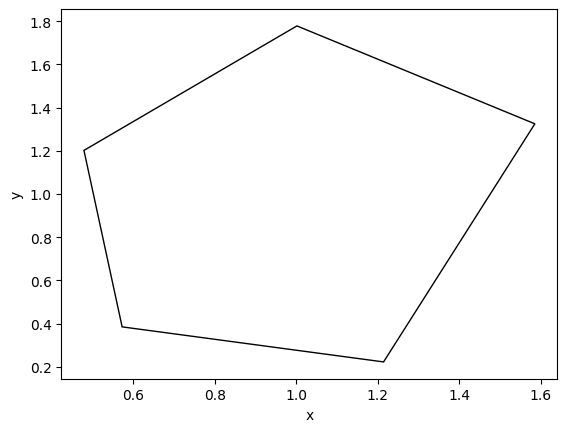

In [135]:
%matplotlib inline

if len(polygon) < 2: print("Liczba punktów mniejsza niż 3")
else:
    draw_polygon(polygon)
    print(polygon)

Poniżej zapisane zostały wielokąty utworzone w celu przetestowania poprawności algorytmu.

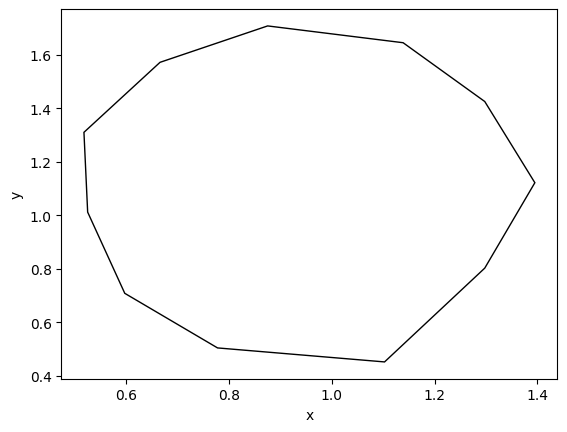

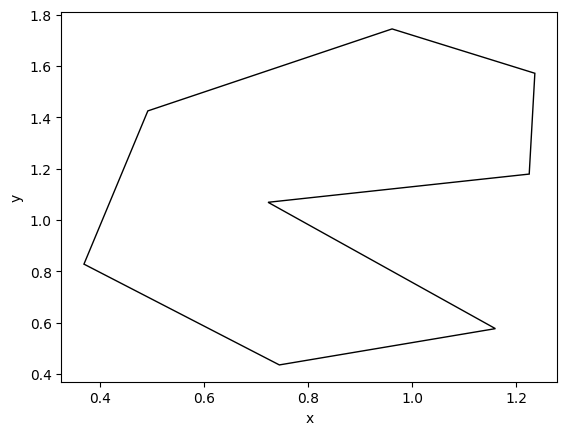

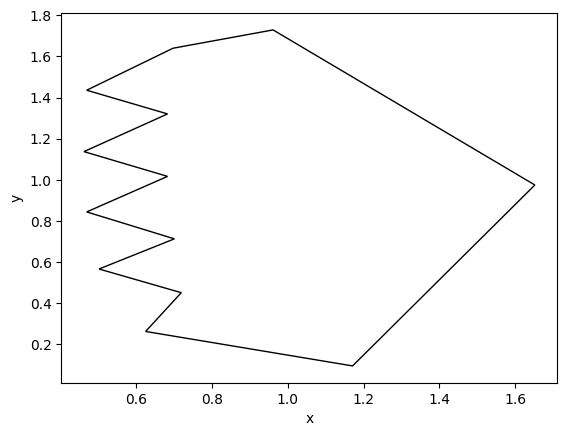

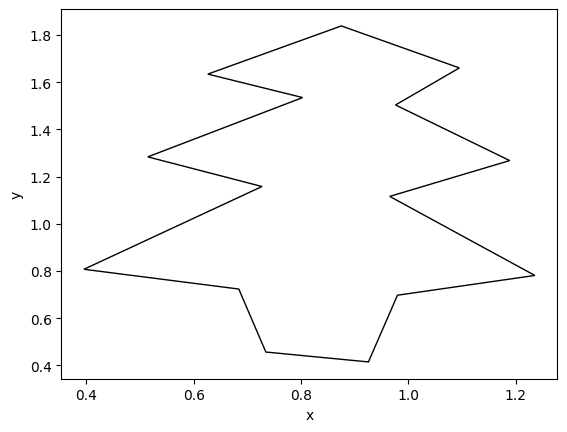

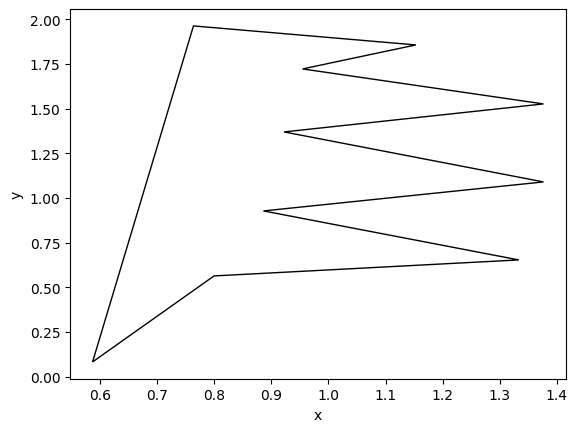

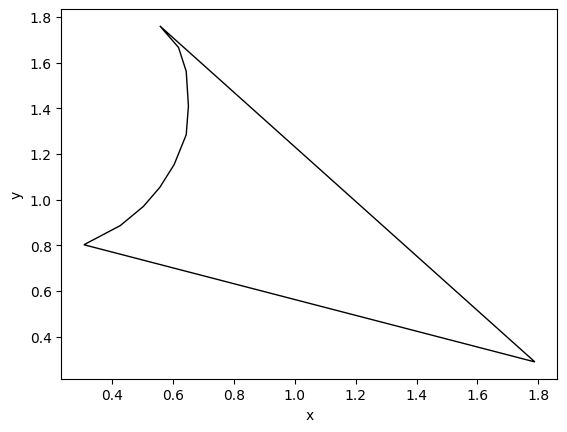

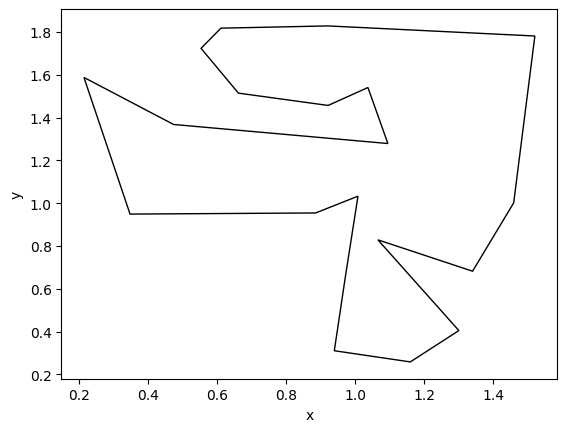

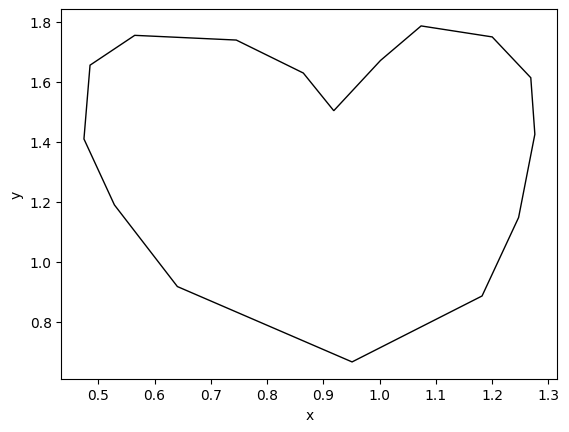

In [136]:
A = [(0.8752114476173767, 1.708061889250814), (0.6659064994298745, 1.571952070730572), (0.5179495532973297, 1.3102024197301068), (0.5251669653037954, 1.0118078175895764), (0.5973410853684513, 0.7081782224290366), (0.7777763855300912, 0.5040134946486737), (1.102559925821043, 0.4516635644485807), (1.2974300499956142, 0.8024080967892041), (1.3948651120828999, 1.1217426710097718), (1.2974300499956142, 1.4253722661703114), (1.138646985853371, 1.6452419730107024)]
B = [(0.9618203916949639, 1.7447068403908792), (0.4926886112747001, 1.4253722661703114), (0.369992607164785, 0.8285830618892508), (0.745298031500996, 0.4359585853885527), (1.160299221872768, 0.577303396928804), (0.7236457954815992, 1.0693927408096786), (1.2252559299309582, 1.179327594229874), (1.2360820479406567, 1.571952070730572)]
C = [(0.9618203916949639, 1.7290018613308513), (0.6983848534589696, 1.6400069799906931), (0.4710363752553033, 1.43584225221033), (0.6839500294460384, 1.3206724057701253), (0.46381896324883776, 1.1374476500697996), (0.6839500294460384, 1.0170428106095857), (0.4710363752553033, 0.8442880409492787), (0.7019935594622024, 0.713413215449046), (0.5035147292843986, 0.5668334108887854), (0.7200370894783664, 0.4516635644485807), (0.6262107333943137, 0.2632038157282456), (1.1711253398824664, 0.09568403908794779), (1.6510832383124285, 0.9751628664495112)]
D = [(0.8752114476173767, 1.8389367147510465), (0.6262107333943137, 1.6347719869706838), (0.8030373275527207, 1.5353071195905068), (0.5143408472940969, 1.2840274546300603), (0.7272545014848321, 1.1583876221498368), (0.3952535491874145, 0.8076430898092134), (0.6839500294460384, 0.7238832014890646), (0.7344719134912976, 0.45689855746859), (0.9257333316626359, 0.4150186133085155), (0.979863921711128, 0.697708236389018), (1.2360820479406567, 0.7814681247091669), (0.9654290976981967, 1.1165076779897625), (1.1891688698986302, 1.2683224755700322), (0.9762552157078952, 1.503897161470451), (1.0953425138145776, 1.6609469520707303)]
E = [(0.76334156151716, 1.963107484602047), (0.5865149673587529, 0.08270731919647709), (0.799428621549488, 0.5640002186752837), (1.3335171100279422, 0.6535430836945966), (0.8860375656270751, 0.9277681078162422), (1.3768215820667358, 1.0900645506637467), (0.9221246256594031, 1.3698860038490992), (1.3768215820667358, 1.5265860176328967), (0.9546029796884983, 1.7224610348626437), (1.1530818098663023, 1.856775332391613)]
F = [(0.5576453193328905, 1.760411819450907), (0.6189933213878481, 1.6661819450907396), (0.6442542634104776, 1.5614820846905535), (0.6514716754169433, 1.4096672871102836), (0.6442542634104776, 1.2840274546300603), (0.6045584973749168, 1.1531526291298275), (0.5576453193328905, 1.0536877617496507), (0.5035147292843986, 0.9699278734295019), (0.4277319032165098, 0.886167985109353), (0.3086446051098274, 0.8024080967892041), (1.7882140664352748, 0.28937878082829216)]
G = [(0.9221246256594031, 1.8284667287110279), (0.6117759093813825, 1.8179967426710093), (0.5540366133296577, 1.723766868310842), (0.6622977934266416, 1.5143671475104696), (0.9221246256594031, 1.4567822242903674), (1.0376032177628527, 1.5405421126105163), (1.0953425138145776, 1.278792461610051), (0.4746450812585361, 1.3677873429502092), (0.21481824902577465, 1.5876570497906), (0.3483403711453882, 0.9489879013494648), (0.8860375656270751, 0.954222894369474), (1.0087335697369904, 1.0327477896696136), (0.9726465097046624, 0.6610632852489529), (0.9401681556755672, 0.31031875290832933), (1.160299221872768, 0.2579688227082363), (1.301038755998847, 0.40454862726849694), (1.066472865788715, 0.8285830618892508), (1.3407345220344078, 0.6820032573289901), (1.4598218201410902, 1.0013378315495576), (1.5211698221960477, 1.7813517915309443)]
H = [(0.9185159196561703, 1.503897161470451), (0.8643853296076784, 1.6295369939506745), (0.745298031500996, 1.73947184737087), (0.564862731339356, 1.7551768264308978), (0.48547119926823457, 1.655711959050721), (0.4746450812585361, 1.4096672871102836), (0.5287756713070281, 1.1897975802698928), (0.6406455574072448, 0.917577943229409), (0.9509942736852655, 0.6662982782689622), (1.1819514578921646, 0.886167985109353), (1.2469081659503551, 1.1479176361098182), (1.2757778139762175, 1.4253722661703114), (1.2685604019697518, 1.6138320148906464), (1.1999949879083287, 1.7499418334108885), (1.0736902777951807, 1.7865867845509535), (1.0015161577305247, 1.6714169381107489)]

polygons = [A, B, C, D, E, F, G, H]
letters = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H']

for p in polygons:
    draw_polygon(p)

## Czy wielokąt jest $y$-monotoniczny?

Wielokąt jest monotoniczny, gdy jego wierzchołki mogą być ułożone w taki sposób, że jedna z jego współrzędnych (na przykład współrzędna $x$ lub $y$, w zależności od układu współrzędnych) zawsze rośnie lub maleje wzdłuż kolejnych wierzchołków. Innymi słowy, dla każdej pary wierzchołków wielokąta (oprócz wierzchołka startowego i końcowego), jeden z punktów ma większą (lub mniejszą) wartość danej współrzędnej niż drugi punkt.

W praktyce, wielokąt monotoniczny może być łatwiej sortowany lub przetwarzany w pewnych algorytmach geometrycznych, ponieważ istnieje pewna kolejność, w jakiej wierzchołki pojawiają się wzdłuż danej osi (np. osi $x$ lub $y$). Monotoniczność może ułatwić znajdowanie przecięć linii w takim wielokącie lub wykonywanie innych operacji geometrycznych. W tym zadaniu interesuje nas monotoniczność wielokąta wzdłuż osi $y$.

<span style="color:red">Ćw.</span> Uzupełnij funkcję ```is_y_monotonic```. Pamiętaj, aby sprawozdanie zawierało krótki opis działania tej funkcji.

In [137]:
def min_max(T):
    n = len(T)
    min_val = T[-1][1]
    max_val = T[-1][1]
    min_val_idx = n - 1
    max_val_idx = n - 1

    for i in range(0, n - 1, 2):
        if T[i][1] < T[i + 1][1]:
            if T[i][1] < min_val:
                min_val = T[i][1]
                min_val_idx = i
            if T[i + 1][1] > max_val:
                max_val = T[i + 1][1]
                max_val_idx = i + 1
        else:
            if T[i + 1][1] < min_val:
                min_val = T[i + 1][1]
                min_val_idx = i + 1
            if T[i][1] > max_val:
                max_val = T[i][1]
                max_val_idx = i

    return min_val_idx, max_val_idx

In [138]:
def is_y_monotonic(polygon):
    """
    Funkcja określa czy podana figura jest y-monotoniczna.
    :param polygon: tablica krotek punktów na płaszczyźnie euklidesowej podanych przeciwnie do ruchu wskazówek zegara - nasz wielokąt
    :return: wartość bool - true, jeśli wielokąt jest monotoniczny i false jeśli nie jest
    """
    n = len(polygon)
    min_idx, max_idx = min_max(polygon)

    i = max_idx
    while i != min_idx:
        j = (i + 1) % n
        if polygon[j][1] >= polygon[i][1]: return False
        i = j

    while i != max_idx:
        j = (i + 1) % n
        if polygon[j][1] <= polygon[i][1]: return False
        i = j

    return True

Przeprowadź test poprawności powyższej funkcji.

In [139]:
Test().runtest(1, is_y_monotonic)

Lab 3, task 1:
	Test 1: Passed
	Test 2: Passed
	Test 3: Passed
	Test 4: Passed
	Test 5: Passed
	Test 6: Passed
	Test 7: Passed
	Test 8: Passed
	Test 9: Passed
	Test 10: Passed
Result: 10/10
Time: 0.004s


Sprawdź monotoniczność swojego wielokątu.

In [140]:
print(is_y_monotonic(polygon))

True


Sprawdzimy teraz monotoniczność przygotowanych wcześniej zbiorów:

In [141]:
for i in range(len(polygons)):
    print(letters[i], ": ", is_y_monotonic(polygons[i]))

A :  True
B :  True
C :  True
D :  True
E :  True
F :  True
G :  False
H :  False


Poniżej znajduje się implementacja rozdzielająca wierzchołki na lewy i prawy łańcuch (względem kierunku monotoniczności). W lewym łańcuchu zostaną zawarte oba punkty skrajne (o maksymalnym i minimalnym "y"). Prawy łańcuch nie będzie ich zawierał.

In [142]:
def split_points_into_chains(polygon):
    n = len(polygon)
    min_idx, max_idx = min_max(polygon)
    left, right = [(polygon[max_idx], max_idx)], [] # w tablicach krotki w postaci (punkt, indeks w oryginalnej tablicy)

    i = max_idx
    while i != min_idx:
        j = (i + 1) % n
        left.append((polygon[j], j))
        i = j

    while i != max_idx:
        j = (i + 1) % n
        right.append((polygon[j], j))
        i = j

    right.pop()
    right.reverse()

    return left, right

***

# Podział wierzchołków na kategorie

Wierzchołki naszego wielokąta możemy podzielić na parę kategorii:
- początkowe, gdy obaj jego sąsiedzi leżą poniżej i kąt wewnętrzny ma mniej niż 180 stopni. To wierzchołki, w których zaczyna się monotoniczny spadek
- końcowe, gdy obaj jego sąsiedzi leżą powyżej i kąt wewnętrzny ma mniej niż 180 stopni. To wierzchołki, w których monotoniczność wielokąta się zmienia, czyli na przykład zaczyna się monotoniczny wzrost, jeśli wcześniej był spadek, lub na odwrót.

Wierzchołki startowe i końcowe są ważne w kontekście algorytmów przetwarzania wielokątów monotonicznych, takich jak algorytmy dziel i zwyciężaj oraz triangulacji.
- dzielący, gdy obaj jego sąsiedzi leżą poniżej i kąt wewnęntrzny ma więcej niż 180 stopni. To wierzchołki, które wyznaczają przekątne (linie łączące), tworzące trójkąty podczas triangulacji.
- łączący, gdy obaj jego sąsiedzi leżą powyżej i kąt wewnęntrzny ma więcej niż 180 stopni. To wierzchołki, które są połączone liniami (przekątnymi) wewnątrz wielokąta, tworząc trójkąty.

Wierzchołki łączące i dzielące odgrywają kluczową rolę w procesie triangulacji wielokątów, pozwalając na podział figury na trójkąty w sposób bezkolizyjny.
- prawidłowy, pozostałe przypadki, jeden sąsiad powyżej, drugi poniżej


### Przykładowy wielokąt z pokolorowanymi wierzchołkami.

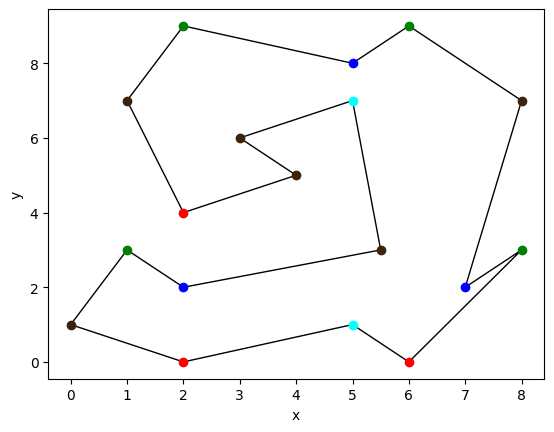

In [143]:
draw_polygon_colors(polygon_example_2,polygon_example_colors)

<span style="color:red">Ćw.</span> Uzupełnij funkcję ```color_vertex``` .

In [144]:
def orient(a, b, c):
    return (b[0] - a[0]) * (c[1] - b[1]) - (b[1] - a[1]) * (c[0] - b[0])

In [145]:
def color_vertex(polygon, eps = 1e-24):
    """
    Funkcja dzieli wierzchołki na kategorie i przypisuje wierzchołkom odpowiednie numery: 0 - początkowy, 1 - końcowy, 2 - łączący, 3 - dzielący, 4 - prawdiłowy
    :param polygon: tablica krotek punktów na płaszczyźnie euklidesowej podanych przeciwnie do ruchu wskazówek zegara - nasz wielokąt
    :return: tablica o długości n, gdzie n = len(polygon), zawierająca cyfry z przedziału 0 - 4, gdzie T[i] odpowiada kategorii i-tego wierzchołka.
    """
    n = len(polygon)
    colors = [None] * n

    for i in range(n):
        prev = polygon[i - 1]
        curr = polygon[i]
        next = polygon[(i + 1) % n]
        if prev[1] < curr[1] and next[1] < curr[1]:
            if (o := orient(prev, curr, next)) > eps:
                colors[i] = 0
            elif o < -eps:
                colors[i] = 3
            else: colors[i] = 4
        elif prev[1] > curr[1] and next[1] > curr[1]:
            if (o := orient(prev, curr, next)) > eps:
                colors[i] = 1
            elif o < -eps:
                colors[i] = 2
            else: colors[i] = 4
        else:
            colors[i] = 4

    return colors

Przeprowadź test poprawności powyższej funkcji. 

In [146]:
Test().runtest(2, color_vertex)

Lab 3, task 2:
	Test 1: Passed
	Test 2: Passed
	Test 3: Passed
	Test 4: Passed
	Test 5: Passed
	Test 6: Passed
	Test 7: Passed
	Test 8: Passed
	Test 9: Passed
	Test 10: Passed
Result: 10/10
Time: 0.004s


Zwizualizuj swój wielokąt z pokolorowanymi według kategorii wierzchołkami.

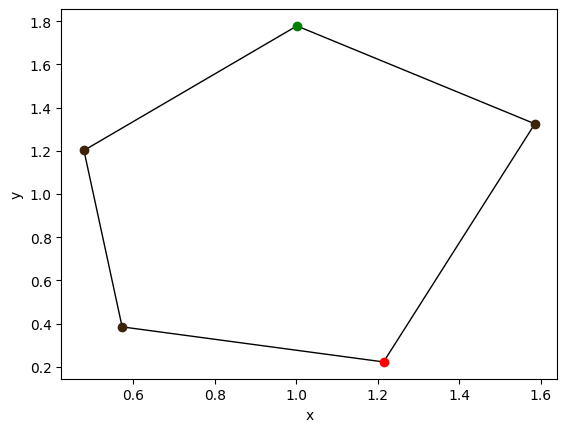

In [147]:
colors = color_vertex(polygon)
draw_polygon_colors(polygon,colors)

Wizualizacja pokolorowań dla wcześniej przygotowanych zbiorów:

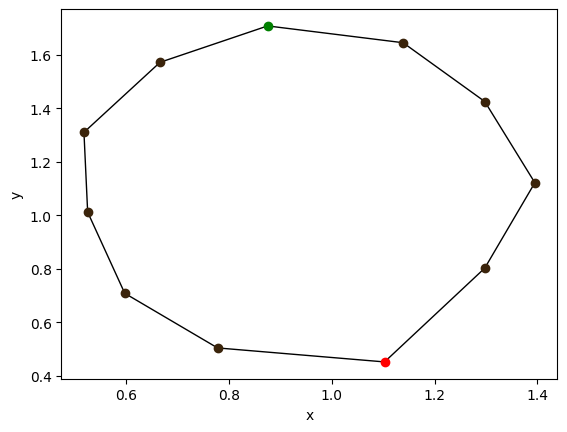

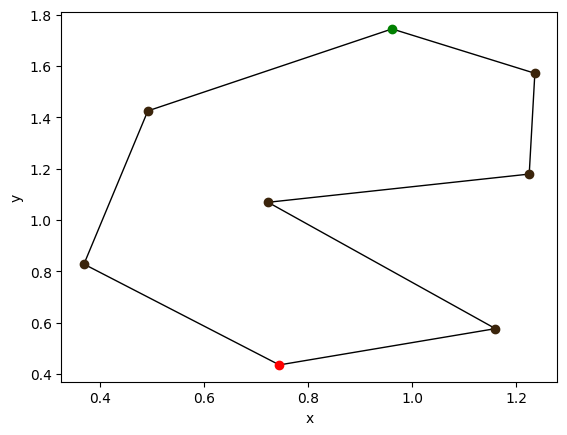

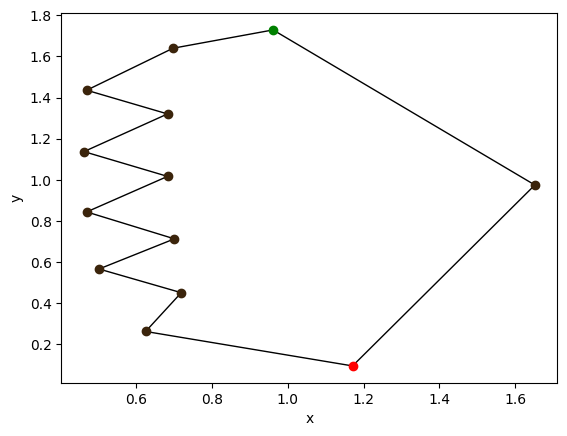

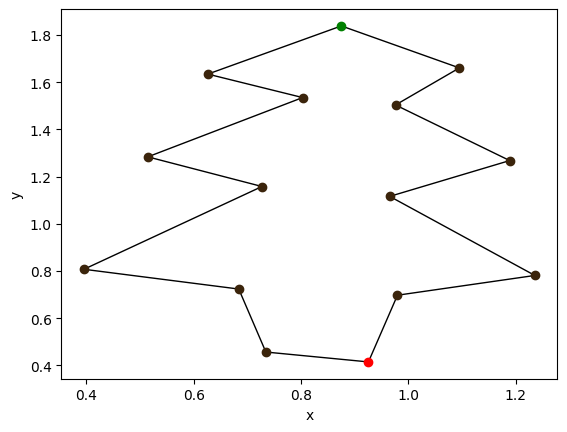

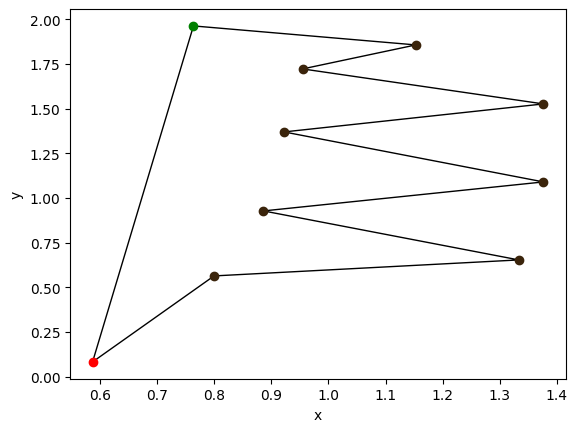

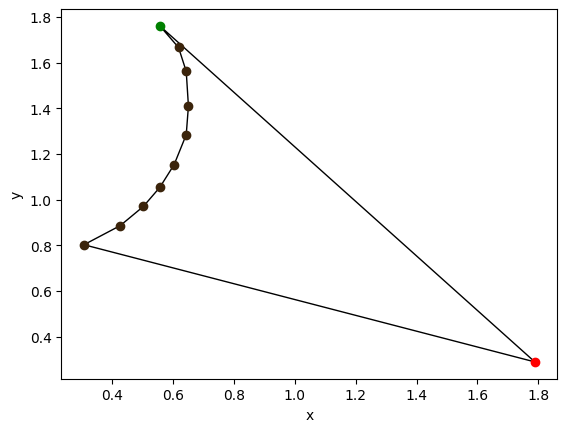

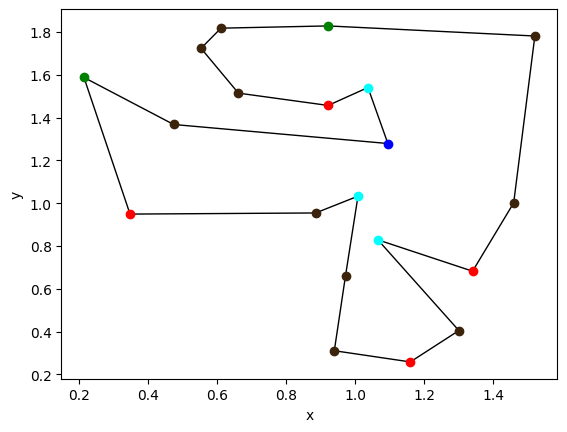

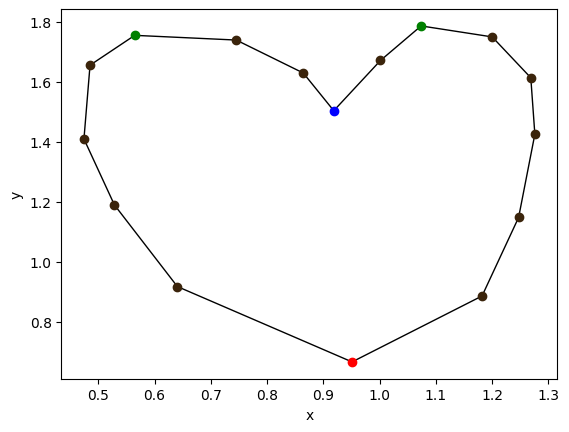

In [148]:
for p in polygons:
    draw_polygon_colors(p,color_vertex(p))

***

# Triangulacja wielokąta monotonicznego

Triangulacja wielokąta monotonicznego to proces podziału wielokąta monotonicznego na trójkąty poprzez dodawanie przekątnych (linii łączących wierzchołki), które nie przecinają się wewnętrznie.

### Przykładowy wielokąt podzielony na trójkąty.

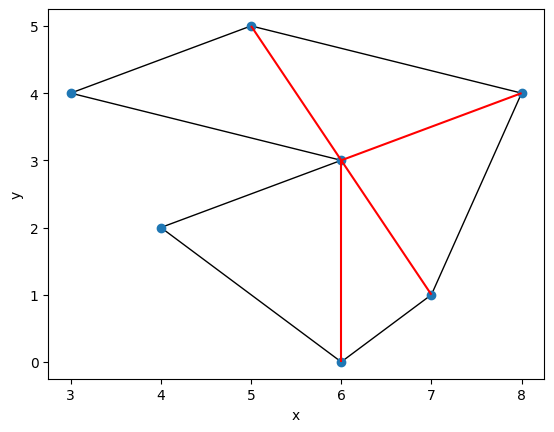

In [149]:
draw_polygon_tri(polygon_example_1, polygon_example_tri)

<span style="color:red">Ćw.</span> Uzupełnij funkcję ```triangulation```. Wykorzystaj algorytm opisany na wykładzie.

In [150]:
def merge_chains(left, right, n):
    merged = [None] * n

    i, j, k = 0, 0, 0
    # skoro left zawiera min_y to na pewno wcześniej skończy się right
    while j < len(right):
        if left[i][0][1] > right[j][0][1]:
            merged[k] = (*left[i], 'l') # do krotki dodana informacja o tym czy na lewym czy na prawym łańcuchu
            i += 1
        else:
            merged[k] = (*right[j], 'r')
            j += 1
        k += 1

    for l in range(i, len(left)):
        merged[k] = (*left[l], 'l')
        k += 1

    return merged

In [151]:
def proper_triangle(S_first, S_second, curr, n, eps):
    # sprawdza czy może powstać odpowiedni trójkąt w triangulacji gdy curr pochodzi z przeciwnego łańcucha niż punkty na stosie
    # pomaga w niedodawaniu przekątnych, które są bokami

    diff = abs(curr[1] - S_first[1])
    if diff == 1 or diff == n - 1: return False # sprawdzenie czy są "sąsiadami" w orygianlnym wielokącie

    if curr[2] == 'r':
        return orient(S_first[0], S_second[0], curr[0]) < -eps
    else:
        return orient(S_first[0], S_second[0], curr[0]) > eps 

In [152]:
def triangulation(polygon, eps = 1e-24):
    """
    Funkcja dokonuje triangulacji wielokąta monotonicznego.
    :param polygon: tablica krotek punktów na płaszczyźnie euklidesowej podanych przeciwnie do ruchu wskazówek zegara - nasz wielokąt
    :return: tablica krotek dodawanych po kolei przekątnych np: [(1,5),(2,3)], oznacza, że triangulacja polega na dodaniu przekątnej pomiędzy wierzchołki o indeksach 1 i 5 oraz 2 i 3
    """
    n = len(polygon)
    sorted = merge_chains(*split_points_into_chains(polygon), n)
    diagonals = []
    
    S = [sorted[0], sorted[1]] # stos

    for i in range(2, n):
        curr = sorted[i]
        if curr[2] != S[-1][2]: # jeśli kolejny wierzchołek należy do innego łańcucha niż wierzchołek stanowiący szczyt stosu
            for j in range(len(S) - 1, -1, -1):
                diff = abs(curr[1] - S[j][1])
                if diff != 1 and diff != n - 1: # czy wierzchołki nie są "sąsiadami" w oryginalnym wielokącie
                    diagonals.append((curr[1], S[j][1]))
            S = [S[-1]] # na stosie zostaje jak na razie poprzedni punkt z wierzchu
        else: # kiedy są na tym samym łańcuchu
            last = len(S) - 1
            for j in range(len(S) - 2, -1, -1):
                if proper_triangle(S[j], S[last], curr, n, eps):
                    diagonals.append((curr[1], S[j][1]))
                    for _ in range(len(S) - 1, last - 1, -1):
                        S.pop()
                    last = j
        S.append(curr)

    return diagonals

Jakich struktur można użyć do przechowywania wielokątu, oraz utworzonej triangulacji? Uzasadnij wybór struktury w swoim algorytmie

ODPOWIEDŹ: Wielokąt przechowuję jako listę wierzchołków zadanych w kolejności przeciwnej do ruchu wskazówek zegara.
Dane topologiczne są oddzielone: utworzona triangulacja to tablica krotek, które reprezentują naniesione przekątne pomiędzy punktami o poszczególnych indeksach z tablicy wierzchołków wielokąta. Została ona wybrana ze względu na łatwość zapisu oraz późniejszej wizualizacji.

Ostatecznie dane te są scalane i traingulacja wielokąta zwracana jest jako lista krawędzi. W takiej postaci może być wypisana lub zapisana do pliku, w celu późniejszego wykorzystania.

Przeprowadź testy poprawności powyższej funkcji.


In [153]:
Test().runtest(3, triangulation)

Lab 3, task 3:
	Test 1: Passed
	Test 2: Passed
	Test 3: Passed
	Test 4: Passed
	Test 5: Passed
	Test 6: Passed
	Test 7: Passed
	Test 8: Passed
	Test 9: Passed
	Test 10: Passed
Result: 10/10
Time: 0.005s


Funkcja tworząca listę krawędzi na podstawie oryginalnej listy wierzchołków oraz zwróconej przez algorytm liście krotek informującej o tym, między którymi wierzchołkami o danych indeksach należy poprowadzić przekątne. Wielokąt po triangulacji byłby zwracany w taki sposób.

In [154]:
def gen_final_triangulation(polygon, tri):
    edges = []
    for i in range(len(polygon) - 1):
        edges.append((polygon[i], polygon[i + 1]))
    
    edges.append((polygon[-1], polygon[0]))

    for x, y in tri:
        edges.append((polygon[x], polygon[y]))

    return edges

Zwizualizuj powstały wielokąt podzielony na trójkąty.
Poniżej zostanie także wypisana triangulacja w postaci listy krawędzi.

[((0.4782537872617689, 1.2019931319378878), (0.5720801433458217, 0.384914488636658)), ((0.5720801433458217, 0.384914488636658), (1.2144298119212598, 0.22261804578915342)), ((1.2144298119212598, 0.22261804578915342), (1.5861265302542382, 1.3251145713394428)), ((1.5861265302542382, 1.3251145713394428), (1.0015161577305247, 1.7784253254997142)), ((1.0015161577305247, 1.7784253254997142), (0.4782537872617689, 1.2019931319378878)), ((0.4782537872617689, 1.2019931319378878), (1.5861265302542382, 1.3251145713394428)), ((0.5720801433458217, 0.384914488636658), (1.5861265302542382, 1.3251145713394428))]


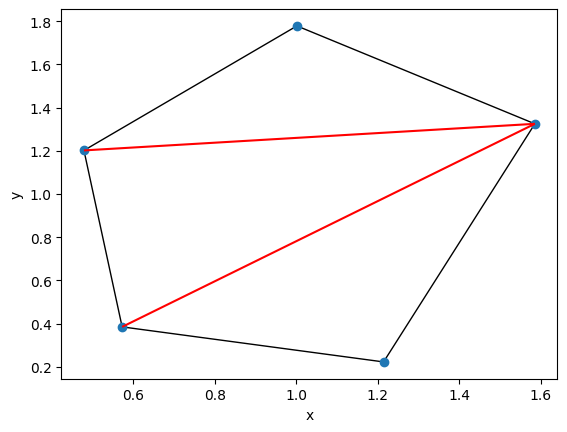

In [155]:
tri = triangulation(polygon)
draw_polygon_tri(polygon, [(polygon[x], polygon[y]) for (x, y) in tri])
print(gen_final_triangulation(polygon, tri))

Zwizualizujmy traingulacje zadanych wcześniej zbiorów. Wypiszemy także liczbę dodanych przekątnych oraz wynikowe listy krawędzi triangulacji.

A : Liczba punktów:  11 , Liczba dodanych przekątnych:  8
[((0.8752114476173767, 1.708061889250814), (0.6659064994298745, 1.571952070730572)), ((0.6659064994298745, 1.571952070730572), (0.5179495532973297, 1.3102024197301068)), ((0.5179495532973297, 1.3102024197301068), (0.5251669653037954, 1.0118078175895764)), ((0.5251669653037954, 1.0118078175895764), (0.5973410853684513, 0.7081782224290366)), ((0.5973410853684513, 0.7081782224290366), (0.7777763855300912, 0.5040134946486737)), ((0.7777763855300912, 0.5040134946486737), (1.102559925821043, 0.4516635644485807)), ((1.102559925821043, 0.4516635644485807), (1.2974300499956142, 0.8024080967892041)), ((1.2974300499956142, 0.8024080967892041), (1.3948651120828999, 1.1217426710097718)), ((1.3948651120828999, 1.1217426710097718), (1.2974300499956142, 1.4253722661703114)), ((1.2974300499956142, 1.4253722661703114), (1.138646985853371, 1.6452419730107024)), ((1.138646985853371, 1.6452419730107024), (0.8752114476173767, 1.708061889250814)), ((0

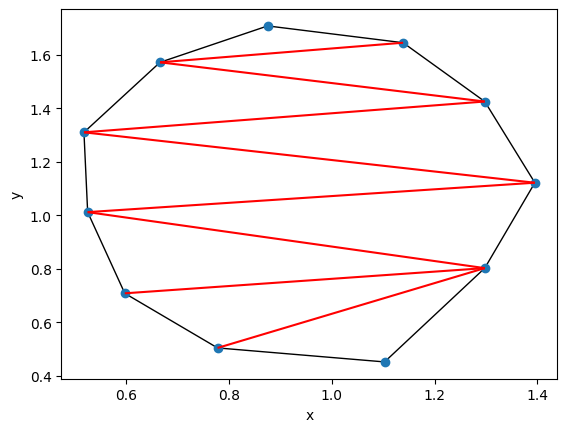

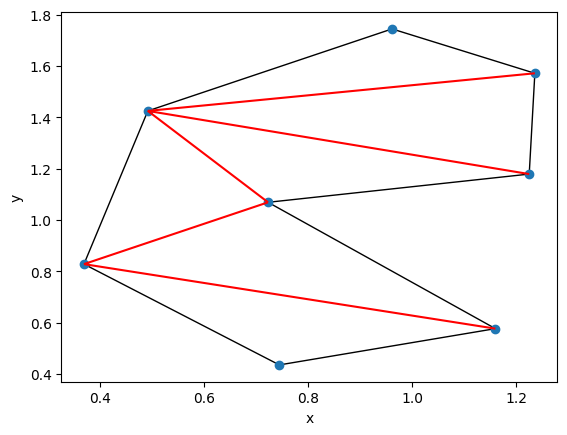

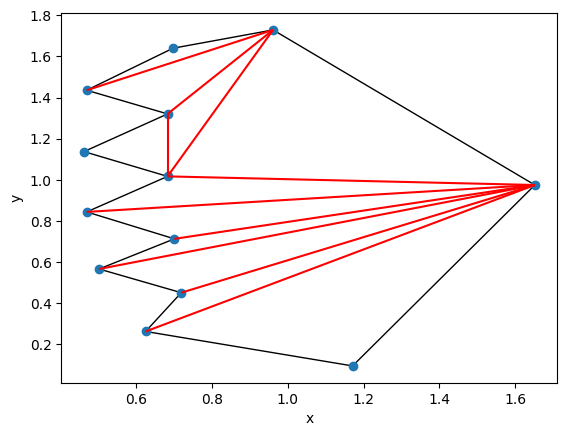

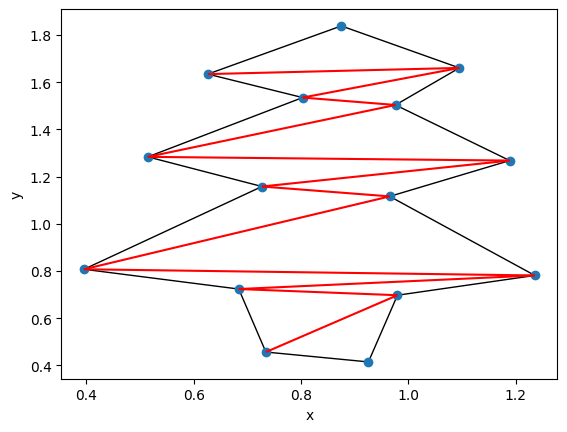

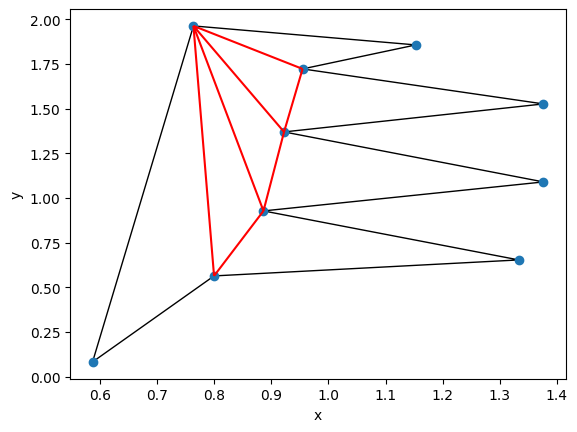

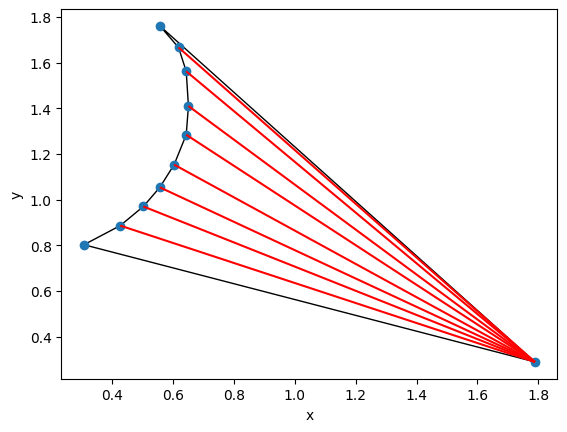

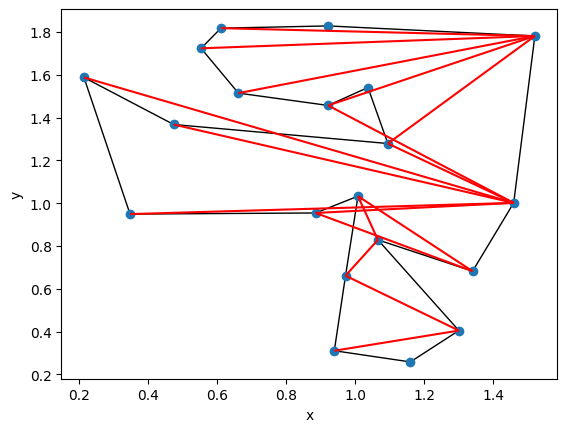

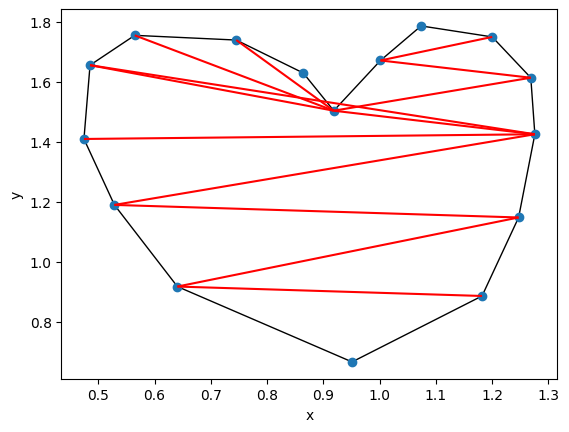

In [156]:
for i in range(len(polygons)):
    p = polygons[i]
    tri = triangulation(p)
    draw_polygon_tri(p, [(p[x], p[y]) for (x, y) in tri])
    print(letters[i], ": Liczba punktów: ", len(polygons[i]), ", Liczba dodanych przekątnych: ", len(tri))
    print(gen_final_triangulation(p, tri), end = '\n\n')

Poniższy kod służy do trangulacji wielokąta wraz z zapisaniem poszczególnych kroków algorytmu w celu wizualizacji.

In [157]:
def triangulation_draw(polygon, eps = 1e-24):
    n = len(polygon)
    sorted = merge_chains(*split_points_into_chains(polygon), n)
    
    S = [sorted[0], sorted[1]] # stos

    vis = Visualizer()
    vis.add_line_segment([(polygon[i], polygon[(i + 1) % n]) for i in range(n)], color = "black")
    vis.add_point([S[0][0], S[1][0]], color = "red")

    for i in range(2, n):
        curr = sorted[i]
        vis.add_point(curr[0], color = "red")
        if curr[2] != S[-1][2]: # jeśli kolejny wierzchołek należy do innego łańcucha niż wierzchołek stanowiący szczyt stosu
            for j in range(len(S) - 1, -1, -1):
                diff = abs(curr[1] - S[j][1])
                if diff != 1 and diff != n - 1: # czy wierzchołki nie są "sąsiadami" w oryginalnym wielokącie
                    vis.add_line_segment((polygon[curr[1]], polygon[S[j][1]]), color = "red")
                if j != len(S) - 1: vis.add_point(S[j][0], color = "yellow")
            S = [S[-1]] # na stosie zostaje jak na razie poprzedni punkt z wierzchu
        else: # kiedy są na tym samym łańcuchu
            last = len(S) - 1
            for j in range(len(S) - 2, -1, -1):
                if proper_triangle(S[j], S[last], curr, n, eps):
                    vis.add_line_segment((polygon[curr[1]], polygon[S[j][1]]), color = "red")
                    for _ in range(len(S) - 1, last - 1, -1):
                        vis.add_point(S[-1][0], color = "yellow")
                        S.pop()
                    last = j
        S.append(curr)

    return vis

Na poniższych wizualizacjach  przyjęto następujące oznaczenia kolorystyczne:
- kolorem czarnym oznaczono boki wielokąta,
- na czerwono zaznaczane są wierzchołki znajdujące się na stosie oraz dodawane przekątne,
- na żółto kolorowane są wierzchołki zdjęte ze stosu.

Wizualizacja kroków powstałego wielokąta.

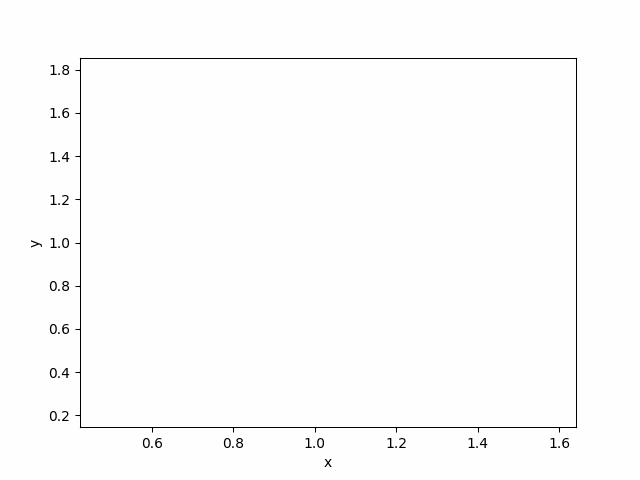

In [158]:
triang_vis=triangulation_draw(polygon)
triang_vis.show_gif()

Zwizualizujmy kroki dla zadanych wcześniej wielokątów:

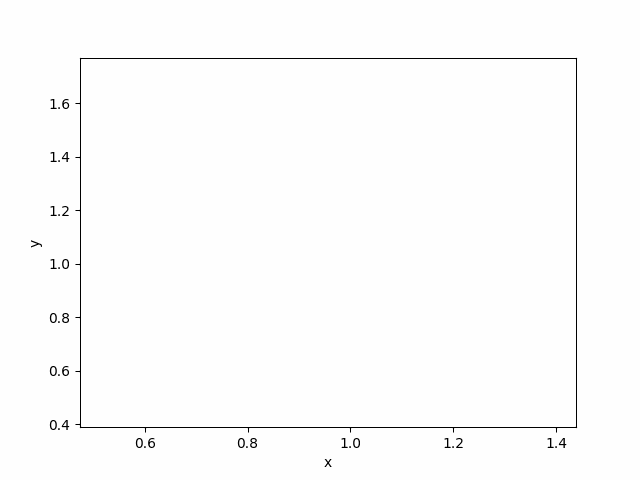

In [159]:
triang_vis = triangulation_draw(A)
triang_vis.show_gif()

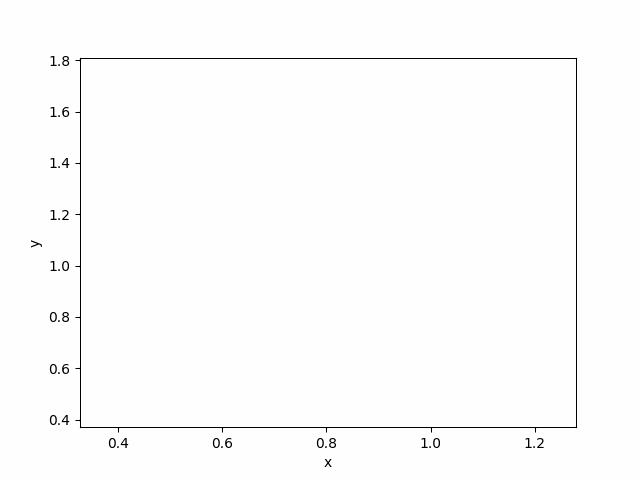

In [160]:
triang_vis = triangulation_draw(B)
triang_vis.show_gif()

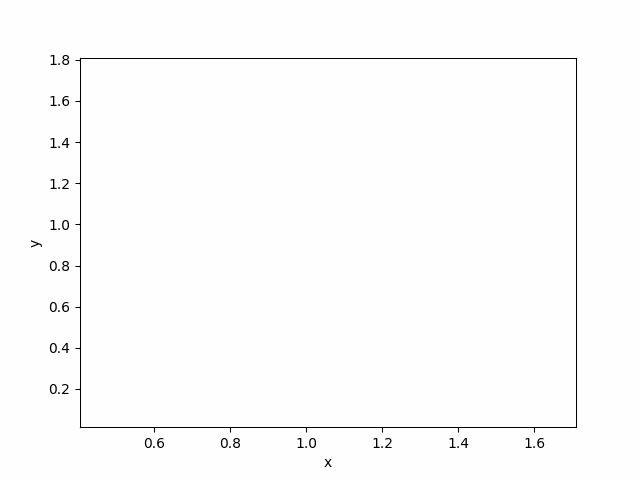

In [161]:
triang_vis = triangulation_draw(C)
triang_vis.show_gif()

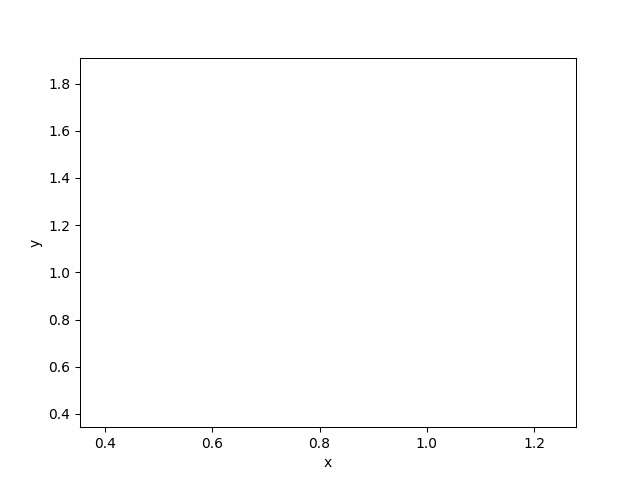

In [162]:
triang_vis = triangulation_draw(D)
triang_vis.show_gif()

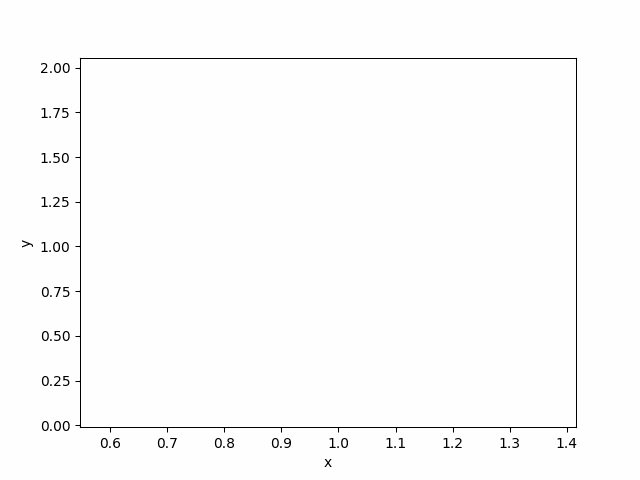

In [163]:
triang_vis = triangulation_draw(E)
triang_vis.show_gif()

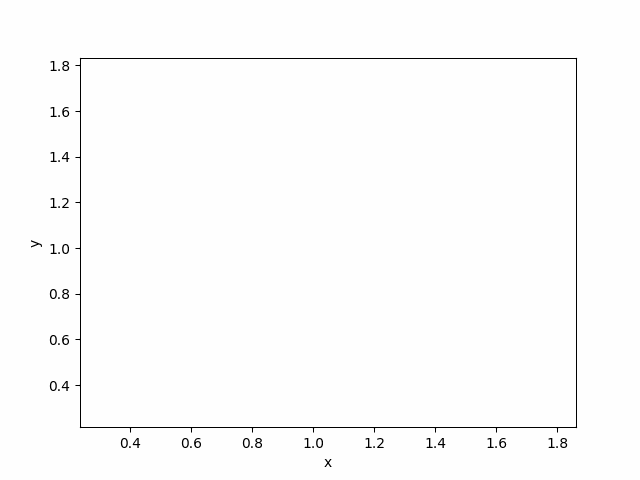

In [164]:
triang_vis = triangulation_draw(F)
triang_vis.show_gif()

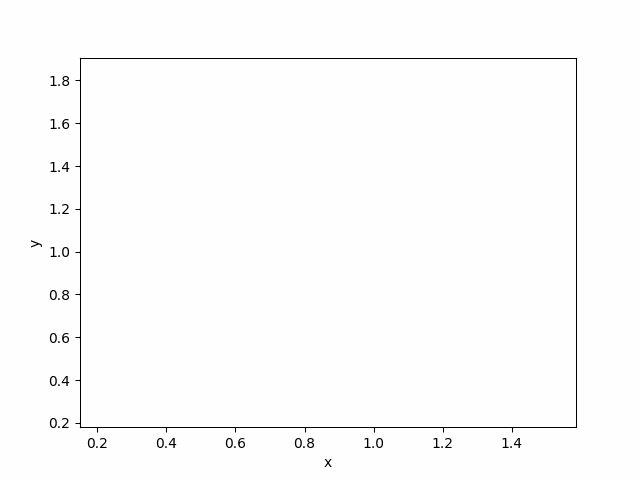

In [165]:
triang_vis = triangulation_draw(G)
triang_vis.show_gif()

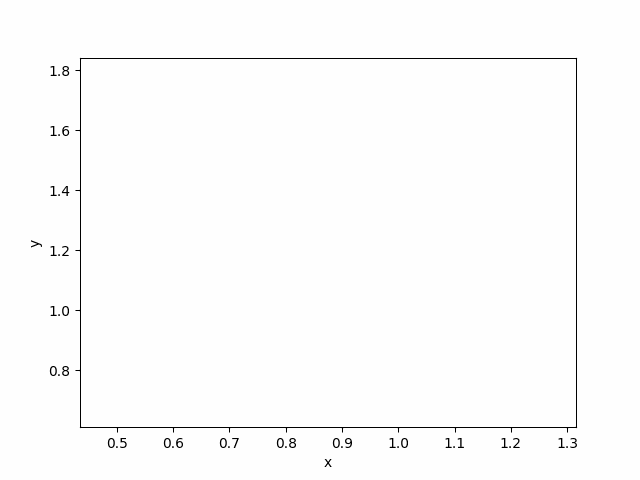

In [166]:
triang_vis = triangulation_draw(H)
triang_vis.show_gif()